# CAPM output for Apple stock

I’ve been asked to find the CAPM output for Apple stock using stock returns from 2021. I inserted some data into the CAPM equation because I’ve been told the following:

Apple trades in the United States.
The current yield of a US Treasury bond for 10 years is 1.72%.
The average excess annual return for US stocks on the Standard & Poor’s (S&P) 500 is 10.5%.
However, you’re not given the beta (beta_i) value. We’ll use Python to calculate this, and we can plug beta_i into the CAPM equation afterwards and see what the return on Apple stock might be. 

For the worked example, I’ll follow these steps:

- Import the packages, set the dates, and then get the required data.
- Check the relationships between the key variables, and calculate the relevant cumulative returns.
- Draw the trend line.
- Perform a linear regression analysis.
- Find the return value (i.e. the expected value).
- Draw the line of best fit.

In [ ]:
# Import packages for ‘CAPM output for Apple stock’ example:
import statsmodels.api as sm 
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
# [1] Install Pandas ‘DataReader’. 
!pip install pandas-datareader 

# [2] Import data from the web from ‘pandas_datareader’. 
from pandas_datareader import data as web 

Working with stocks often means you need up-to-date data, so we’ll use Pandas Datareader to grab some data from Yahoo! Finance and then read it as a DataFrame. 

To add Pandas Datareader to our workspace:

Install pandas-datareader using the pip install command.
Import data from the web from pandas_datareader. (This allows us to create a Pandas DataFrame object by using various data sources from the internet.)

In [3]:
# [1] Set the start date.
start = datetime.datetime(2021,1,1)

# [2] Set the end date.  
end = datetime.datetime(2022,1,1)  

The average excess annual return for US stocks on the S&P 500, which is 10.5%. 

To access the S&P data, I used the pandas-datareader with 'SPY' (which tracks the S&P 500 index) and 'yahoo' (to pull the data from Yahoo! Finance) in conjunction with the start and end dates.

In [4]:
# Use the Pandas Datareader to pull data from the web;
# specify the 'ticket' and the website, as well as the start and end dates:
df_spy = web.DataReader('SPY','yahoo',start,end)   

df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,362.811646
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,365.310486
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,367.494446
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,372.954498
2021-01-08,381.489990,377.100006,380.589996,381.260010,71677200.0,375.079529


In [5]:
# Pull Apple’s stock index.
df_apple = web.DataReader('AAPL','yahoo',start,end)   

# Print the results.
df_apple.head()  

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264969
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850815
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479843
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761612
2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,130.881622


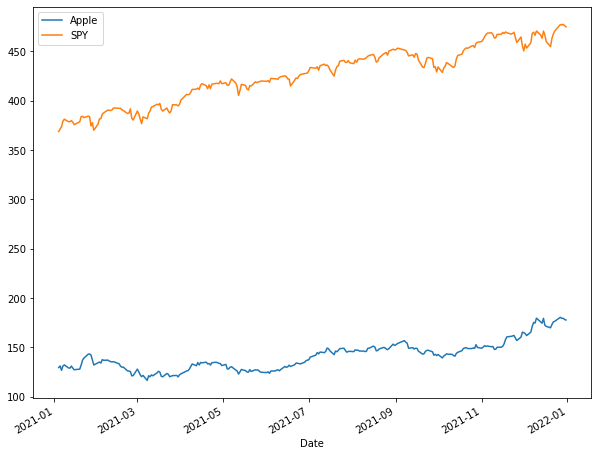

In [6]:
# Closing stock price line plot for ‘Apple’:
df_apple['Close'].plot(label = 'Apple', figsize=(10,8))

# Closing stock price line plot for ‘SPY’:
df_spy['Close'].plot(label = 'SPY')
plt.legend()

A quick glance at the chart suggests that Apple’s stock performance is mimicking the market’s, judging by the similar shapes and trajectories, meaning we can statistically compare them. 

Finding the cumulative returns (i.e. the total earnings on an investment over a period of time) of each and ploting them on a graph.

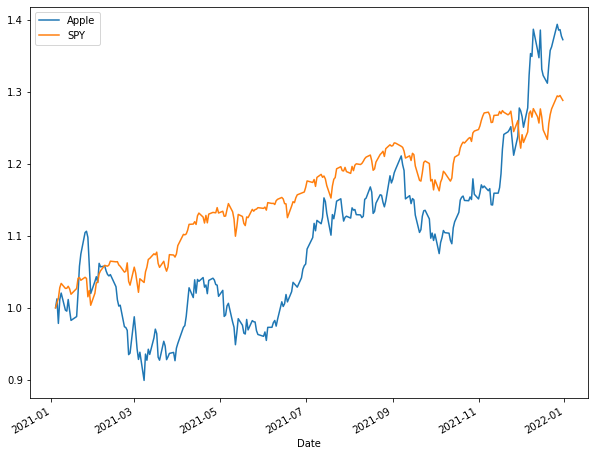

In [7]:
# [1a] Calculate the cumulative sum of closing prices for ‘Apple’ stocks; 
# stores sum in a new column named 'Cumu’:
df_apple['Cumu'] = df_apple['Close']/df_apple['Close'].iloc[0]


# [1b] Calculate the cumulative sum of closing prices for ‘SPY’ stocks; 
# stores sum in a new column named 'Cumu’:
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0] #TBA

# [2] Plot line graphs for the calculated ‘Cumu’ columns for 
# both ‘Apple’ and ‘SPY’ stocks:
df_apple['Cumu'].plot(label = 'Apple', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

To better understand the correlation, let’s visualise the daily returns using a scatterplot

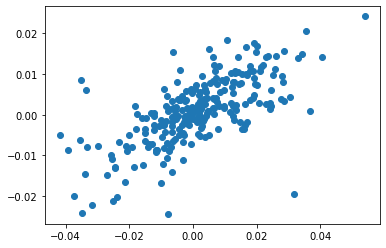

In [8]:
# [1] Calculate daily returns and 
# [2] percentage change using ‘pandas pct_change()’:
df_apple['daily_ret'] = df_apple['Close'].pct_change(1) 
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

# [3] Plot the daily returns on a scatterplot:
plt.scatter(df_apple['daily_ret'],df_spy['daily_ret'])

In [10]:
# [1] Join the DataFrames with the close value column.
daily_prices = pd.concat([df_apple['Close'], df_spy['Close']], axis=1)  
# [2] Set column labels.
daily_prices.columns = ['Apple', 'SPY']  

# [3] Print the new table.
print(daily_prices.head()) 

                 Apple         SPY
Date                              
2021-01-04  129.410004  368.790009
2021-01-05  131.009995  371.329987
2021-01-06  126.599998  373.549988
2021-01-07  130.919998  379.100006
2021-01-08  132.050003  381.260010


In [11]:
# Get the percentage change. 
daily_returns = daily_prices.pct_change(1)  
# Print the percentage change.
print(daily_returns.head()) 

               Apple       SPY
Date                          
2021-01-04       NaN       NaN
2021-01-05  0.012364  0.006887
2021-01-06 -0.033662  0.005979
2021-01-07  0.034123  0.014857
2021-01-08  0.008631  0.005698


In [12]:
# Get the percentage change.
daily_returns = daily_prices.pct_change(1)  
# Remove the first row (as we don’t have any data from the previous day, 2021-01-03)
clean_daily_returns = daily_returns.dropna(axis=0)
# Print the new DataFrame.  
print(clean_daily_returns.head()) 

               Apple       SPY
Date                          
2021-01-05  0.012364  0.006887
2021-01-06 -0.033662  0.005979
2021-01-07  0.034123  0.014857
2021-01-08  0.008631  0.005698
2021-01-11 -0.023249 -0.006741


In [15]:
clean_daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-01-05 to 2021-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Apple   251 non-null    float64
 1   SPY     251 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [13]:
from statsmodels.formula.api import ols

In [16]:
# Create formula and pass through OLS methods:
f = 'SPY ~ Apple'
test = ols(f, data = clean_daily_returns).fit()

In [17]:
# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     213.8
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.27e-35
Time:                        10:23:57   Log-Likelihood:                 927.22
No. Observations:                 251   AIC:                            -1850.
Df Residuals:                     249   BIC:                            -1843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.000      1.440      0.151      -0.000       0.001
Apple          0.3545      0.024     14.621      0.000       0.307       0.402
==============================================================================
Omnibus:                       35.524   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.676
Skew:                          -0.518   Prob(JB):                     8.45e-28
Kurtosis:                       6.294   Cond. No.                         63.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  
# Extract the standard errors.
print("Standard errors: ", test.bse)  
# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    0.000551
Apple        0.354489
dtype: float64
Standard errors:  Intercept    0.000383
Apple        0.024245
dtype: float64
Predicted values:  [ 4.93403323e-03 -1.13814086e-02  1.26475293e-02  3.61091368e-03
 -7.69022252e-03  5.65348729e-05  6.30340441e-03 -4.81118764e-03
 -4.31609746e-03  2.47507634e-03  1.21983536e-02  1.35461895e-02
  6.24918782e-03  1.03648379e-02  1.14652012e-03 -2.17257786e-03
 -1.18506466e-02 -1.27139586e-02  6.40741925e-03  2.79751986e-03
 -2.20612076e-03  9.68207316e-03 -1.07428949e-03  9.40058478e-04
 -1.77908643e-03 -1.06469365e-03 -1.29511219e-04  1.18079763e-03
 -5.15744678e-03 -5.70337917e-03 -2.51028898e-03  9.88464835e-04
 -1.00121846e-02  1.57352288e-04 -8.85210874e-04 -1.17788227e-02
  1.34231325e-03  1.96408848e-02 -6.85533558e-03 -8.11835233e-03
 -5.05391508e-03  4.35786146e-03 -1.42215688e-02  1.49610833e-02
 -2.69825822e-03  6.40125579e-03 -2.15191136e-03  9.22086902e-03
  5.06847111e-03 -1.73542676e-03 -1.14677623e-02 -1.

In [18]:
# Reshape ‘SPY’ data to 2D.
X = clean_daily_returns['SPY'].values.reshape(-1, 1)  
# Reshape ‘Apple’ data to 2D.
y = clean_daily_returns['Apple'].values.reshape(-1, 1)  

In [20]:
# Run the linear regression test.
lr = LinearRegression()  
# Fit the model.
lr.fit(X, y) 

LinearRegression()

Now, let’s check our coefficient/slope (beta_i) using the coef_ attribute.

In [21]:

# Check/Call the coefficient (beta value).
lr.coef_  

array([[1.30313819]])

Let’s check our intercept (i.e. LaTeX: c, where the function crosses the y-axis, also known as intercept/constant)

In [23]:
# Check/call the intercept (c).
lr.intercept_ 

array([2.68456838e-05])

Our beta_i (slope or coefficient) is 1.30. This means that Apple’s stock is more volatile than the market. 

Alpha, the standard performance ratio, and how it’s used to evaluate stocks. In our regression analysis, we actually found alpha – it’s the intercept, in this instance 0.00055123! This is really low (in fact, close to zero), which means that the investment is barely outperforming the benchmark. However, the CAPM's prediction is that the stock's excess return should be zero. So, to confirm, Apple stock is doing a little better than predicted.

all the inputs we need, plug them into the equation to solve the equation:

ER_i=1.72+0.35(10.5-1.72)

ER_{Apple}=4.79

So the expected return, or prediction, of the Apple stock based on the CAPM formula is 4.79%

#### Drawing the line of best fit

In [24]:
# Set the the x coefficient the constant (intercept) y = beta*x + c
y_pred = lr.coef_ * X + lr.intercept_

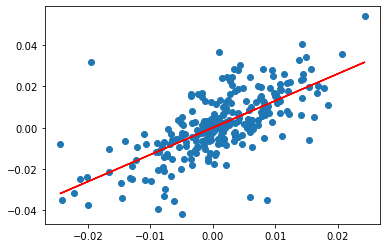

In [25]:
# [1] Draw the scatterplot using Matplotlib. 
plt.scatter(X,y) 
 # [2] Plot X and predicted y as a line;[2a] Set the line colour to red.
plt.plot(X, y_pred, color='red') 